# Calculating Correlation Coefficients
We'll start by computing the Pearson correlation coefficients for all the numeric variables in the dataset. This will give us a matrix of correlation values. The Pearson correlation coefficient can range from -1 to 1:

* A value closer to 1 implies a strong positive correlation.
* A value closer to -1 implies a strong negative correlation.
* A value closer to 0 implies no correlation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('C:\\Users\\ihsankoo\\Downloads\\Liang_Cleaned.csv')

In [2]:
# Adjusting the selected columns and recalculating the correlation matrix
correlation_matrix = df[['Oil Production Rate', 'Water Production Rate', 'Gas Production Rate', 
                         'Water Injection Rate', 'Gas Injection Rate']].corr()

correlation_matrix


,Oil Production Rate,Water Production Rate,Gas Production Rate,Water Injection Rate,Gas Injection Rate
Oil Production Rate,1.000000,0.489063,NaN,-0.488523,NaN
Water Production Rate,0.489063,1.000000,NaN,-0.497141,NaN
Gas Production Rate,NaN,NaN,NaN,NaN,NaN
Water Injection Rate,-0.488523,-0.497141,NaN,1.000000,NaN
Gas Injection Rate,NaN,NaN,NaN,NaN,NaN


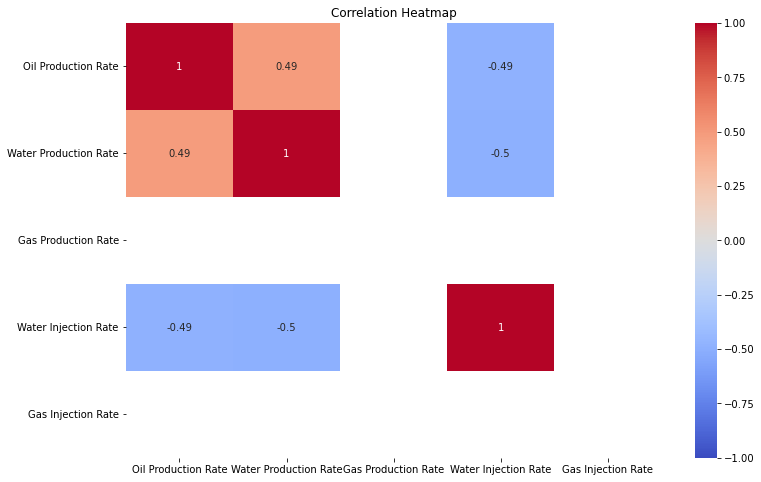

In [3]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

#### From the heatmap, we can observe the following:

- There's a moderate positive correlation between Oil Production Rate and Water Production Rate.
- Oil Production Rate and Water Injection Rate exhibit a moderate negative correlation.
- Water Production Rate and Water Injection Rate also show a negative correlation.
- The Gas Production Rate and Gas Injection Rate are depicted in a neutral color since they don't vary and thus don't have meaningful correlations with other variables.


In [5]:
import plotly.figure_factory as ff

# Remove Gas Production and Gas Injection columns from the correlation matrix
filtered_corr_matrix = correlation_matrix.drop(['Gas Production Rate', 'Gas Injection Rate'], axis=1).drop(['Gas Production Rate', 'Gas Injection Rate'], axis=0)

# Create a heatmap with Plotly for the filtered correlation matrix
z = filtered_corr_matrix.values
x = filtered_corr_matrix.columns.tolist()
y = filtered_corr_matrix.index.tolist()

# Define the heatmap
fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z.round(2), colorscale='Viridis', reversescale=True)

# Update the layout
fig.update_layout(title='Correlation Heatmap without Gas Production & Injection', xaxis=dict(title='Variables'), yaxis=dict(title='Variables'))

# Display the plot
fig.show()